<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数値解の収束性:25点" data-toc-modified-id="数値解の収束性:25点-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数値解の収束性:25点</a></span></li><li><span><a href="#丸め誤差:25点" data-toc-modified-id="丸め誤差:25点-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>丸め誤差:25点</a></span></li><li><span><a href="#Newtonの差分商公式:25点" data-toc-modified-id="Newtonの差分商公式:25点-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Newtonの差分商公式:25点</a></span></li><li><span><a href="#ページランク:25点" data-toc-modified-id="ページランク:25点-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ページランク:25点</a></span></li></ul></div>


<br />

<div style="text-align: center;">
<font size="7">数値計算プレ試験解答例(2015)</font>
</div>
<br />
<div style="text-align: right;">
<font size="4"> 18/12/14 関西学院大学 西谷滋人　</font>
</div>

# 数値解の収束性:25点

次の関数
$$
f(x)=-4\,\exp(-x)+2\,\exp(-2\, x)
$$
は$x=-1..0$に解$-\ln(2)$を持つ．二分法によって数値解を求めよ．繰り返しは１０回程度でいい．また，収束の様子を片対数(logplot)でプロットせよ．

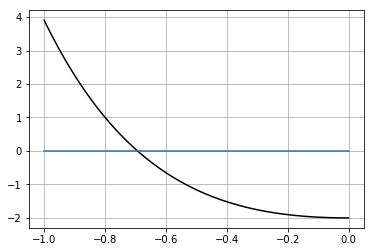

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return -4*np.exp(-x)+2*np.exp(-2*x)

x1, x2 = -1.0, 0.0
x = np.linspace(x1,x2, 101)
y = func(x)
plt.plot(x, y, color = 'k')
plt.plot([x1,x2],[0,0])
plt.grid()
plt.show()

In [16]:
x1, x2 = -1.0, 0.0
f1, f2 = func(x1), func(x2)
print('%+15s %+15s %+15s %+15s'  % ('x1','x2','f1','f2'))
print('%+15.10f %+15.10f %+15.10f %+15.10f' % (x1,x2,f1,f2))
x0 = -np.log(2.0)
list_bisec = [[0],[abs(x1-x0)]]
for i in range(0, 20):
    x = (x1 + x2)/2
    f = func(x)
    if (f*f1>=0.0):
        x1, f1 = x, f
        list_bisec[0].append(i)
        list_bisec[1].append(abs(x1-x0))
    else:
        x2, f2 = x, f
        list_bisec[0].append(i)
        list_bisec[1].append(abs(x2-x0))

    print('%+15.10f %+15.10f %+15.10f %+15.10f' % (x1,x2,f1,f2))

list_bisec
print()

             x1              x2              f1              f2
  -1.0000000000   +0.0000000000   +3.9049848840   -2.0000000000
  -1.0000000000   -0.5000000000   +3.9049848840   -1.1583214259
  -0.7500000000   -0.5000000000   +0.4953780742   -1.1583214259
  -0.7500000000   -0.6250000000   +0.4953780742   -0.4922979148
  -0.7500000000   -0.6875000000   +0.4953780742   -0.0447964325
  -0.7187500000   -0.6875000000   +0.2128474183   -0.0447964325
  -0.7031250000   -0.6875000000   +0.0810265592   -0.0447964325
  -0.6953125000   -0.6875000000   +0.0173789137   -0.0447964325
  -0.6953125000   -0.6914062500   +0.0173789137   -0.0138911236
  -0.6933593750   -0.6914062500   +0.0016980959   -0.0138911236
  -0.6933593750   -0.6923828125   +0.0016980959   -0.0061079375
  -0.6933593750   -0.6928710938   +0.0016980959   -0.0022077800
  -0.6933593750   -0.6931152344   +0.0016980959   -0.0002555572
  -0.6932373047   -0.6931152344   +0.0007210905   -0.0002555572
  -0.6931762695   -0.6931152344   +0.000

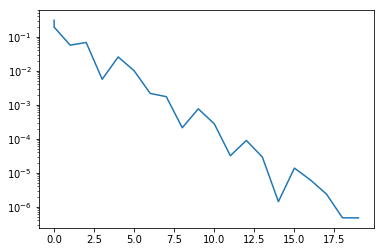

In [17]:
import matplotlib.pyplot as plt

X = list_bisec[0]
Y = list_bisec[1]
plt.plot(X, Y)

plt.yscale("log") # y軸を対数目盛に
plt.show()

# 丸め誤差:25点

大きな数どおしのわずかな差は，丸め誤差にとくに影響を受ける．
1. 23.173-23.094を有効数字がそれぞれ５桁，４桁，３桁，２桁で計算した結果を示せ．
1. 同様に，0.81321/(23.173-23.094)を有効数字がそれぞれ５桁，４桁，３桁，２桁で計算した結果を示せ．

(E.クライツィグ著「数値解析」(培風館,2003), p.10, 問題1.1-3改)


In [12]:
from decimal import *

def pretty_p(result,a,b,operator):
    print('context.prec:{}'.format(getcontext().prec))
    print(' %20.14f' % (a))
    print( '%1s%20.14f' % (operator, b))
    print('-----------')
    print( ' %20.14f' % (result))

In [14]:
getcontext().prec = 5

a=Decimal('0.81321')
b=Decimal('23.173')
c=Decimal('23.094')
pretty_p(b-c,b,c,'-')

print(b-c)
print(a/(b-c))

context.prec:5
    23.17300000000000
-   23.09400000000000
-----------
     0.07900000000000
0.079
10.294


In [15]:
TWOPLACES = Decimal(10) ** -2 
getcontext().prec = 4
a=Decimal('0.81321').quantize(Decimal(10) ** -4)
b=Decimal('23.173').quantize(Decimal('0.01'))
c=Decimal('23.094').quantize(Decimal('0.01'))

pretty_p(b-c,b,c,'-')

print(b-c)
print(a/(b-c))

context.prec:4
    23.17000000000000
-   23.09000000000000
-----------
     0.08000000000000
0.08
10.16


In [16]:
ONEPLACES = Decimal(10) ** -1
getcontext().prec = 3
a=Decimal('0.81321').quantize(Decimal(10) ** -3)
b=Decimal('23.173').quantize(ONEPLACES)
c=Decimal('23.094').quantize(ONEPLACES)

pretty_p(b-c,b,c,'-')

print(b-c)
print(a/(b-c))

context.prec:3
    23.20000000000000
-   23.10000000000000
-----------
     0.10000000000000
0.1
8.13


In [17]:
ZEROPLACES = Decimal(10) ** 0
getcontext().prec = 2
a=Decimal('0.81321').quantize(Decimal(10) ** -2)
b=Decimal('23.173').quantize(ZEROPLACES)
c=Decimal('23.094').quantize(ZEROPLACES)

pretty_p(b-c,b,c,'-')

print(b-c)
print(a/(b-c))

context.prec:2
    23.00000000000000
-   23.00000000000000
-----------
     0.00000000000000
0


DivisionByZero: [<class 'decimal.DivisionByZero'>]

2桁の時には0割となっている．また，3桁でも相当大きなズレが出ていることが確認できる．似た同士の数値の引き算には注意が必要．

# Newtonの差分商公式:25点

次の4点の内挿式をNewtonの差分商公式を用いて求める．
``` python
X:=[-1, 0, 1, 2];
Y:=[4., -2., -1.2, -.52];
```
最初の３点を用いて求めた2次の補間式は，

$$
- 2.00 - 6.00\,x+ 3.40\, \left( x+1 \right) x
$$

である．４点目を取り入れて３次の補間式を求めよ．

In [19]:
# https://stackoverflow.com/questions/14823891/newton-s-interpolating-polynomial-python
# by Khalil Al Hooti (stackoverflow)


def _poly_newton_coefficient(x,y):
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(x[k:m] - x[k-1])

    return a

def newton_polynomial(x_data, y_data, x):
    """
    x_data: data points at x
    y_data: data points at y
    x: evaluation point(s)
    """
    a = _poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1 # Degree of polynomial
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x -x_data[n-k])*p
    return p

[ 4.         -6.          3.4        -1.15333333]


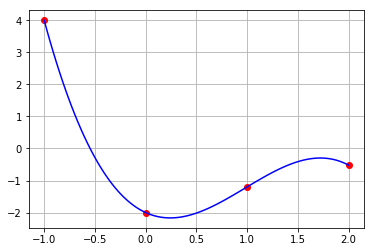

In [22]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# もとの点
x = np.array([-1,0,1,2])
y = np.array([4,-2,-1.2,-0.52])
for i in range(0,4):
    plt.plot(x[i],y[i],'o',color='r')


print(_poly_newton_coefficient(x,y))

xx = np.linspace(-1,2, 100)
yy = newton_polynomial(x, y, xx)
plt.plot(xx, yy, color = 'b')

plt.grid()
plt.show()

Newtonの差分商公式の利点であるデータ点の追加に伴う煩雑さの回避は，このコードでは実感できない．pythonは，やっぱり便利なのかな．

# ページランク:25点

次のようなリンクが張られたページ群のページランクを求めよ．


In [8]:
from pprint import pprint
from numpy import array, zeros, diagflat, dot, transpose, set_printoptions
from scipy.linalg import eig

A = array([[0,1,1,1,0],
           [1,0,1,0,0],
           [0,0,0,1,0],
           [0,0,1,0,1],
           [1,1,0,0,0]])

n = 5
diag = []
for i in range(0,n):
    tmp = 0.0
    for j in range(0,n):
        tmp += A[i,j]
    diag.append(1.0/tmp)

D = diagflat(diag)
tA = dot(transpose(A),D)

set_printoptions(formatter={'float': '{: 0.3f}'.format}) 
pprint(tA)

array([[ 0.000,  0.500,  0.000,  0.000,  0.500],
       [ 0.333,  0.000,  0.000,  0.000,  0.500],
       [ 0.333,  0.500,  0.000,  0.500,  0.000],
       [ 0.333,  0.000,  1.000,  0.000,  0.000],
       [ 0.000,  0.000,  0.000,  0.500,  0.000]])


初期ベクトルを等分の値にして，3度ほどホップさせた結果．

In [9]:
x = array([1/5,1/5,1/5,1/5,1/5])
pprint(dot(tA,dot(tA,dot(tA,x))))


array([ 0.125,  0.111,  0.269,  0.328,  0.167])


固有値を求める．固有値がソートされているか自信がないので，表示させてみた．

In [10]:
l, V = eig(tA)
pprint(l)

array([ 1.00000000+0.j        ,  0.10242347+0.50115386j,
        0.10242347-0.50115386j, -0.81317748+0.j        , -0.39166946+0.j        ])


l[0]に対応する最大固有値のベクトルを取り出す．
さらに，初期ベクトルからのホップと比較するために値を揃えている．
だいたい一致しているが，ホップ数が少ないので一致はそれほど高くない．

In [11]:
v0 = V[:,0]
pprint(v0[0]/0.294*v0)

array([ 0.29497881-0.j,  0.26220338-0.j,  0.55718219-0.j,  0.65550846-0.j,
        0.32775423-0.j])


これより，ページランクは，
[4, 3, 5, 1, 2]
の順になる．

In [14]:
?eig